In [1]:
# Read all .csv files in and aggregate them
import pandas as pd
import glob
import os

folder_path = '/Users/kenny/Downloads/FROG'
all_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Important parameters (ts_event, (action), (side), (depth), bid_px, ask_px, bid_sz, ask_sz, bid_ct, ask_ct)

combined_files = []

for file in all_files:
    df = pd.read_csv(file)
    df['ts_event'] = pd.to_datetime(df['ts_event'], errors='coerce')
    df = df.dropna(subset=['ts_event'])
    df['minute'] = df['ts_event'].dt.floor('T')
    price_cols = ['bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
                 'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01',
                 'bid_px_02', 'ask_px_02', 'bid_sz_02', 'ask_sz_02',
                 'bid_px_03', 'ask_px_03', 'bid_sz_03', 'ask_sz_03',
                 'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04',
                 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
                 'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06',
                 'bid_px_07', 'ask_px_07', 'bid_sz_07', 'ask_sz_07',
                 'bid_px_08', 'ask_px_08', 'bid_sz_08', 'ask_sz_08',
                 'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09']
    df_grouped = df.groupby('minute')[price_cols].mean().reset_index()
    combined_files.append(df_grouped)

full_df = pd.concat(combined_files, ignore_index=True)

In [2]:
full_df.shape

(8162, 41)

In [3]:
full_df.describe(include='all')

<ipython-input-3-ade51ceed394>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  full_df.describe(include='all')


,minute,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,...,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09
count,8162,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,...,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
unique,8162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-04-08 19:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2025-04-03 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-05-02 19:59:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,31.558176,31.655448,135.355877,127.790147,31.536510,31.678007,137.115648,127.766938,31.513999,...,185.746126,193.634016,31.305056,31.922851,192.096405,197.905593,31.252005,31.979262,198.657270,207.495123
std,NaN,1.843547,1.832685,116.621356,123.766175,1.846383,1.831061,99.358042,102.407832,1.848406,...,155.345634,157.118531,1.851704,1.816142,154.918935,164.542849,1.849016,1.812275,172.970879,180.359831
min,NaN,27.055600,27.220230,1.000000,1.000000,26.977600,27.251724,1.000000,1.000000,26.940800,...,1.000000,1.000000,26.588084,27.466364,1.000000,1.000000,26.478178,27.486364,1.000000,1.000000
25%,NaN,30.170172,30.279766,62.013889,52.488287,30.150000,30.320000,84.619702,72.603046,30.130496,...,102.500000,104.000000,29.940918,30.670066,105.848107,104.400000,29.892665,30.726481,106.000000,107.132366


In [4]:
full_df.head(10)

,minute,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,...,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09
0,2025-04-03 13:30:00+00:00,30.958911,31.707228,271.386139,252.663366,30.940396,31.939901,297.118812,76.831683,30.904752,...,67.613861,174.336634,30.408416,32.809208,89.920792,244.465347,30.337327,32.934653,83.267327,196.792079
1,2025-04-03 13:31:00+00:00,31.414357,31.815857,207.114286,192.692857,31.299643,31.924357,153.414286,121.242857,31.223214,...,263.185714,307.642857,30.956000,32.475286,280.407143,135.500000,30.911786,32.588786,255.964286,123.428571
2,2025-04-03 13:32:00+00:00,31.410000,31.870000,516.666667,220.000000,31.150000,31.990000,200.000000,100.000000,31.100000,...,100.000000,241.666667,30.860000,32.508333,100.000000,105.000000,30.830000,32.626667,104.000000,100.000000
3,2025-04-03 13:33:00+00:00,31.410000,31.870000,500.000000,220.750000,31.195000,31.990000,200.000000,100.000000,31.100000,...,100.000000,297.500000,30.860000,32.507500,100.000000,107.500000,30.830000,32.615000,104.000000,100.000000
4,2025-04-03 13:34:00+00:00,31.508571,31.870000,231.571429,101.571429,31.312857,31.990000,285.714286,121.428571,31.160000,...,314.285714,175.714286,30.868571,32.519286,100.000000,102.142857,30.842857,32.640714,102.285714,100.000000
5,2025-04-03 13:35:00+00:00,31.422105,31.870000,230.789474,3.000000,31.361579,31.990000,168.421053,223.789474,31.222632,...,386.842105,800.000000,30.891053,32.500000,178.947368,130.000000,30.853684,32.510000,101.263158,100.000000
6,2025-04-03 13:36:00+00:00,31.430000,31.830345,168.000000,151.586207,31.420000,31.947241,100.000000,223.689655,31.183103,...,600.000000,305.344828,30.880000,32.412759,100.000000,367.931034,30.860000,32.471724,100.000000,243.103448
7,2025-04-03 13:37:00+00:00,31.140635,31.697063,110.817460,232.119048,31.103730,31.752063,166.531746,180.238095,31.054921,...,183.150794,185.444444,30.792857,32.099524,129.722222,205.230159,30.737937,32.158413,244.285714,183.817460
8,2025-04-03 13:38:00+00:00,31.040476,31.730000,115.190476,481.476190,31.009524,31.866190,107.142857,100.000000,30.999524,...,174.333333,138.095238,30.630000,32.274762,78.666667,41.190476,30.588571,32.358095,462.285714,63.809524
9,2025-04-03 13:39:00+00:00,31.136250,31.730000,277.375000,391.000000,31.111250,31.870000,121.750000,100.000000,31.053750,...,302.500000,100.000000,30.742500,32.290000,226.875000,5.000000,30.650000,32.400000,66.000000,100.000000


In [5]:
# Calculate Spread/Midprice
full_df['spread'] = full_df['ask_px_00'] - full_df['bid_px_00']
full_df['mid_price'] = (full_df['ask_px_00'] + full_df['bid_px_00']) / 2

full_df['imbalance'] = (full_df['bid_sz_00'] - full_df['ask_sz_00']) / (full_df['bid_sz_00'] + full_df['ask_sz_00'])
full_df['beta_t'] = full_df['spread'] / (full_df['bid_sz_00'] + full_df['ask_sz_00'])

full_df = full_df.replace([float('inf'), -float('inf')], pd.NA).dropna()

# Simulate market order execution and compute slippage.
import numpy as np

def compute_gtX(row, x, side='buy', levels=5):
    try:
        if side == 'buy':
            prices = [row[f'ask_px_0{i}'] for i in range(levels)]
            sizes = [row[f'ask_sz_0{i}'] for i in range(levels)]
        else:
            prices = [row[f'bid_px_0{i}'] for i in range(levels)]
            sizes = [row[f'bid_sz_0{i}'] for i in range(levels)]
        
        # Check for NaNs or missing values
        if any(pd.isnull(p) or pd.isnull(s) for p, s in zip(prices, sizes)):
            return np.nan

        remaining = x
        cost = 0
        for p, s in zip(prices, sizes):
            if remaining <= s:
                cost += p * remaining
                remaining = 0
                break
            else:
                cost += p * s
                remaining -= s
        
        if remaining > 0:
            return np.nan  # Not enough liquidity

        avg_price = cost / x
        # Check for mid-price components
        if pd.isnull(row['ask_px_00']) or pd.isnull(row['bid_px_00']):
            return np.nan
        mid_price = (row['ask_px_00'] + row['bid_px_00']) / 2
        slippage = avg_price - mid_price
        return slippage

    except KeyError:
        return np.nan  # Handles case where expected columns are missing

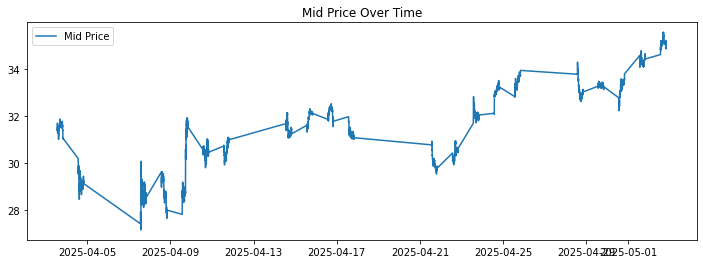

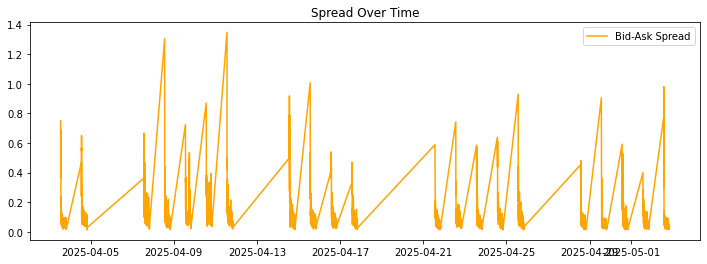

In [6]:
# Plot Spread/Midprice
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(full_df['minute'], full_df['mid_price'], label='Mid Price')
plt.title("Mid Price Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(full_df['minute'], full_df['spread'], label='Bid-Ask Spread', color='orange')
plt.title("Spread Over Time")
plt.legend()
plt.show()

In [7]:
# Testing intervals
import numpy as np

X_values = [5, 50, 100, 200, 500, 1000]

slippage_total = []

for X in X_values:
    slippages = []
    for idx, row in full_df.iterrows():
        if X <= row['ask_sz_00']:
            slippage = compute_gtX(row, X)
            slippages.append(slippage)
    avg_slippage = np.mean(slippages)
    slippage_total.append((X, avg_slippage))

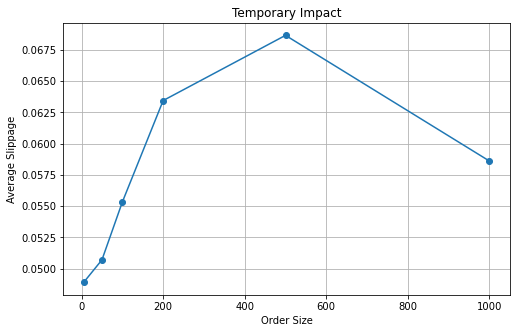

In [8]:
# Plot gt(X) vs X
import matplotlib.pyplot as plt
X_plot, gtX_plot = zip(*slippage_total)
plt.figure(figsize=(8,5))
plt.plot(X_plot, gtX_plot, marker='o')
plt.xlabel('Order Size')
plt.ylabel('Average Slippage')
plt.title('Temporary Impact')
plt.grid()
plt.show()

In [9]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_beta(row, sizes=[10, 25, 50]):
    X, y = [], []
    for size in sizes:
        slip = compute_gtX(row, size)
        if not np.isnan(slip):
            X.append([size])
            y.append(slip)
    if len(X) >= 2:
        model = LinearRegression().fit(X, y)
        return model.coef_[0]
    return np.nan

full_df['beta_t'] = df.apply(lambda row: fit_linear_beta(row), axis=1)
full_df['imbalance'] = (full_df['bid_sz_00'] - full_df['ask_sz_00']) / (full_df['bid_sz_00'] + full_df['ask_sz_00'])
df_model = full_df[['spread', 'imbalance', 'mid_price', 'beta_t']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['spread', 'mid_price', 'imbalance']
X = df_model[features]
y = df_model['beta_t']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 9.40187569307806e-08
R² Score: 0.020945226460945432


In [11]:
# Polynomial (Based on linear modelling)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

print("MSE:", mean_squared_error(y_test, poly_y_pred))
print("R²:", r2_score(y_test, poly_y_pred))

MSE: 9.27136755077418e-08
R²: 0.03453555927106755


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
  MSE: 6.743442636660567e-08
  R²: 0.2977784519774015


In [13]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit polynomial regression
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_pipeline.fit(X_train, y_train)

# Predict
df_model['beta_poly'] = poly_pipeline.predict(X)
'''

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.pipeline import make_pipeline\n\n# Fit polynomial regression\npoly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())\npoly_pipeline.fit(X_train, y_train)\n\n# Predict\ndf_model['beta_poly'] = poly_pipeline.predict(X)\n"

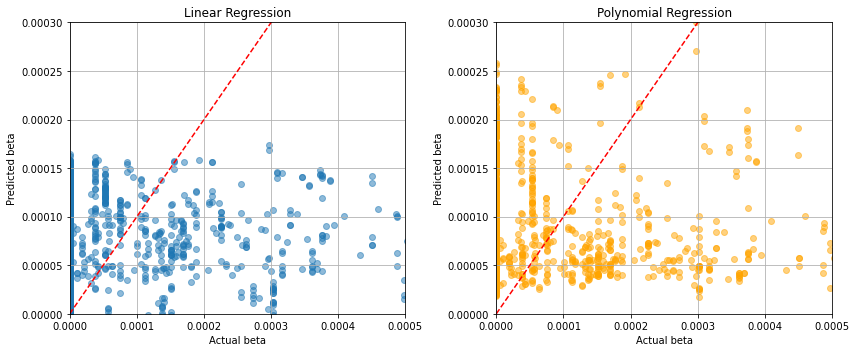

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Linear Regression")
plt.grid()

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, poly_y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Polynomial Regression")
plt.grid()

plt.tight_layout()
plt.show()

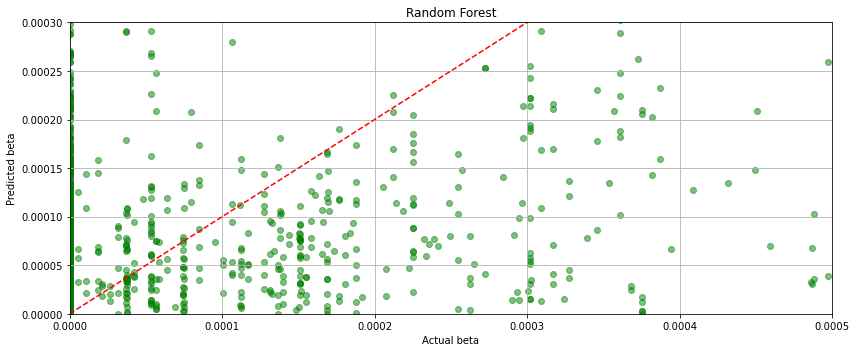

In [15]:
# Random Forest
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Random Forest")

plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.grid()
plt.tight_layout()
plt.show()

                        minute       gtX
0    2025-04-03 13:30:00+00:00  0.374158
1    2025-04-03 13:31:00+00:00  0.200750
2    2025-04-03 13:32:00+00:00  0.230000
3    2025-04-03 13:33:00+00:00  0.230000
4    2025-04-03 13:34:00+00:00  0.180714
...                        ...       ...
8157 2025-05-02 19:55:00+00:00  0.010441
8158 2025-05-02 19:56:00+00:00  0.010760
8159 2025-05-02 19:57:00+00:00  0.013923
8160 2025-05-02 19:58:00+00:00  0.008778
8161 2025-05-02 19:59:00+00:00  0.011232

[8137 rows x 2 columns]
gtX Min: 0.0060087719298564934 | Max: 0.690587128027687


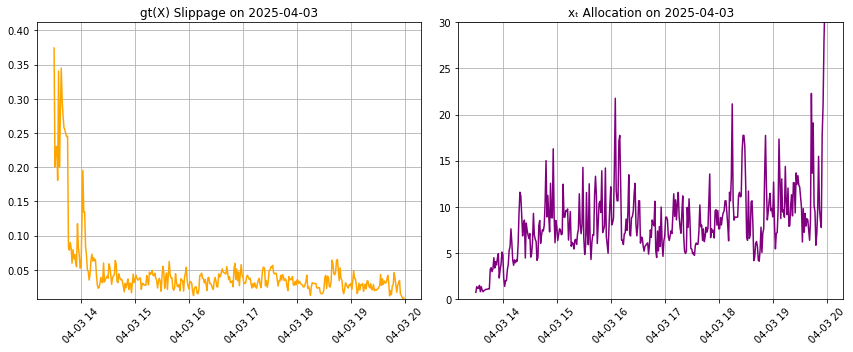

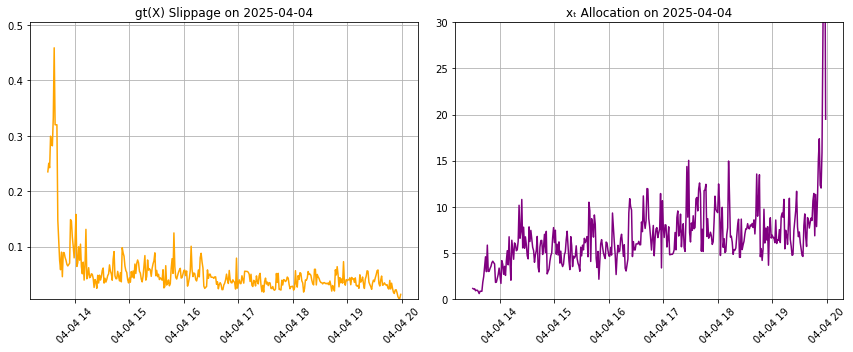

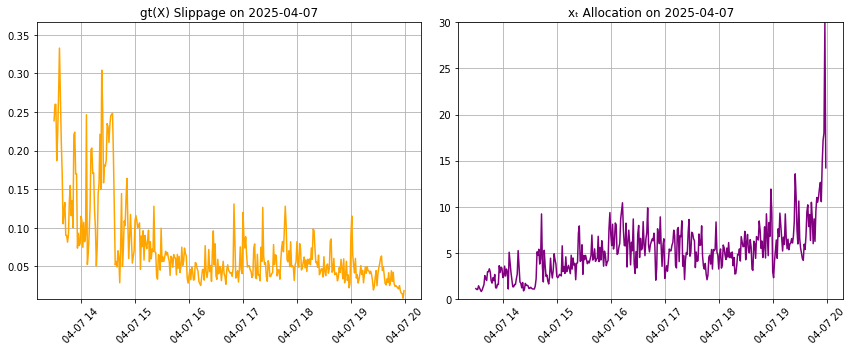

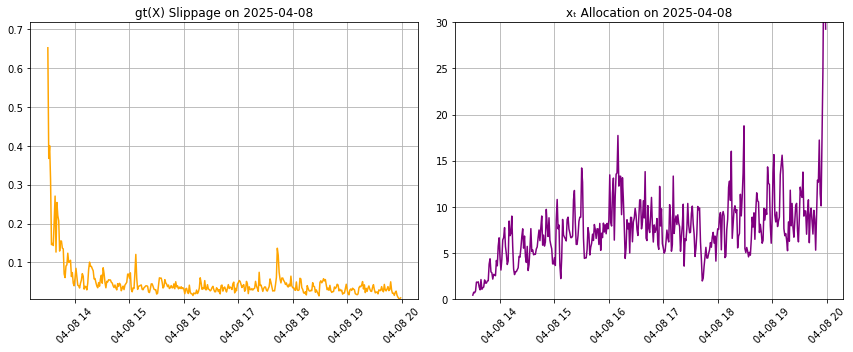

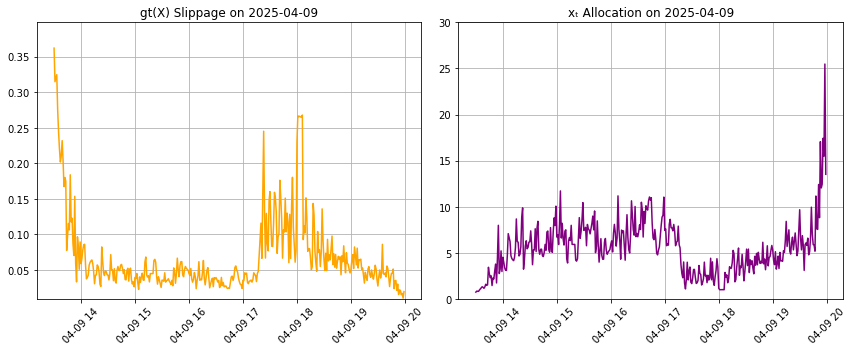

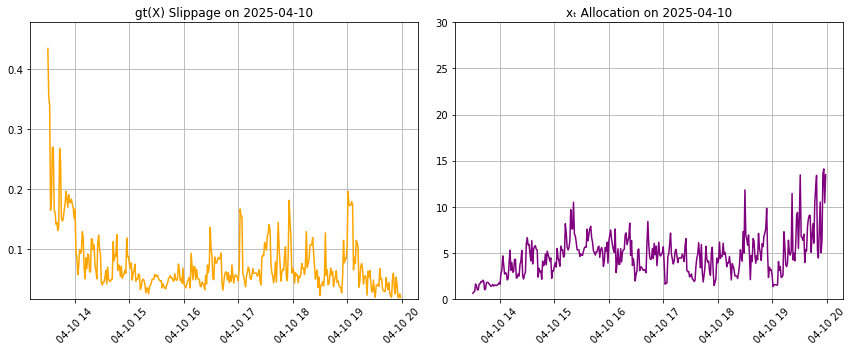

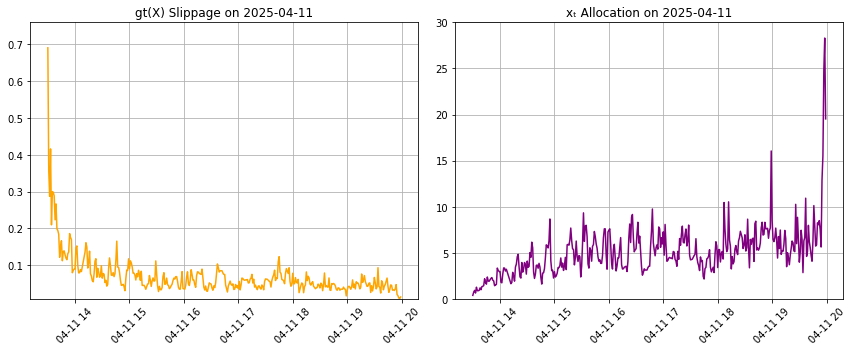

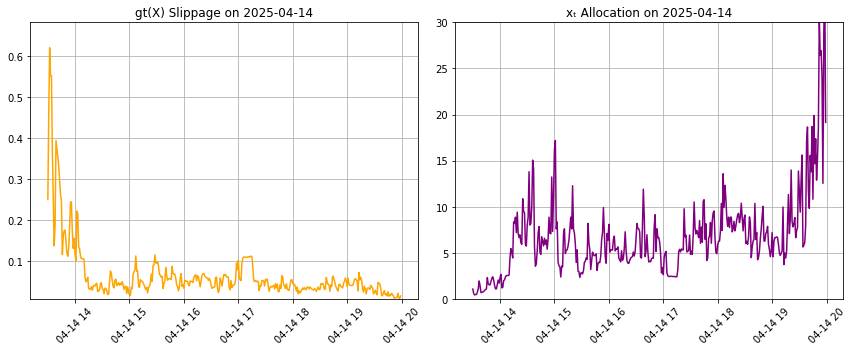

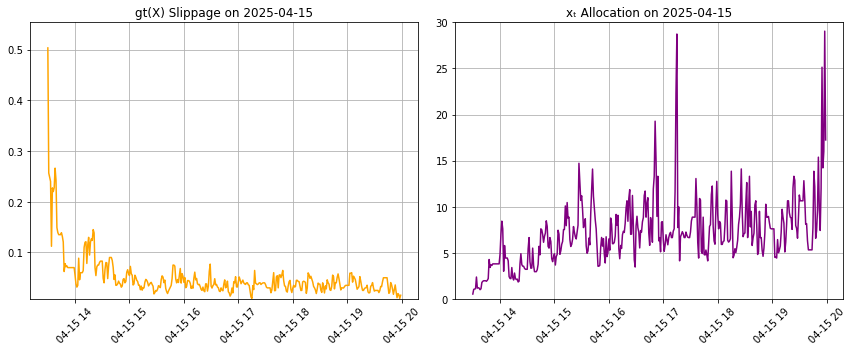

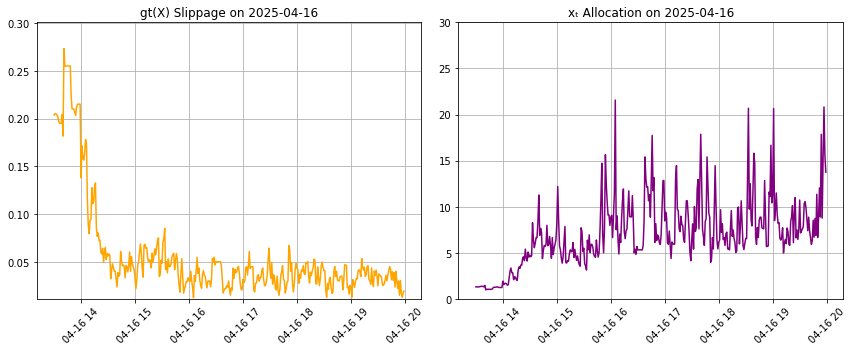

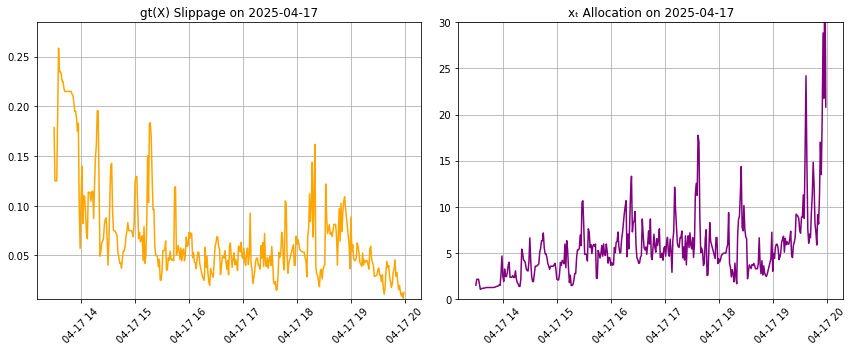

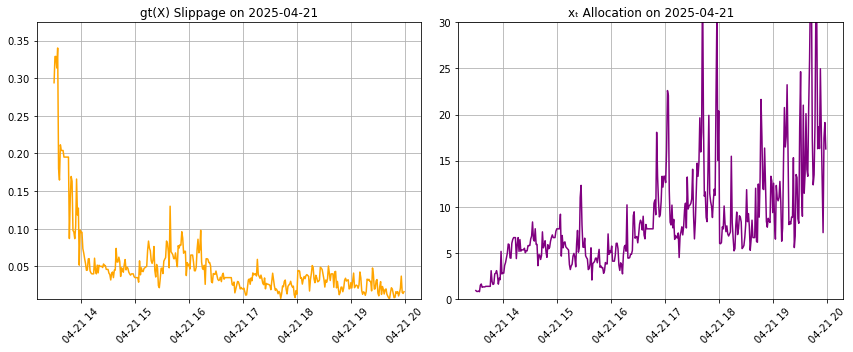

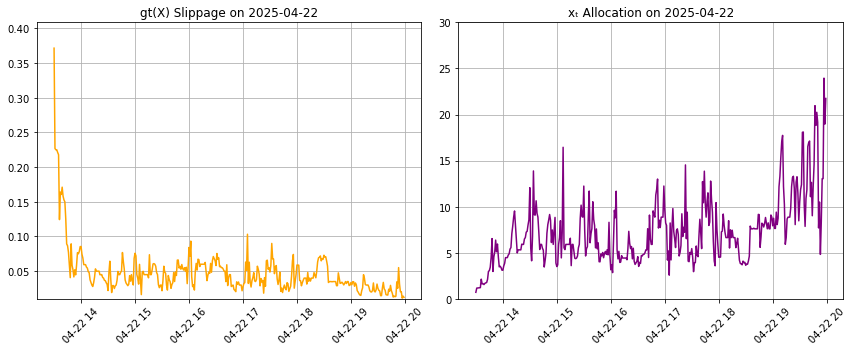

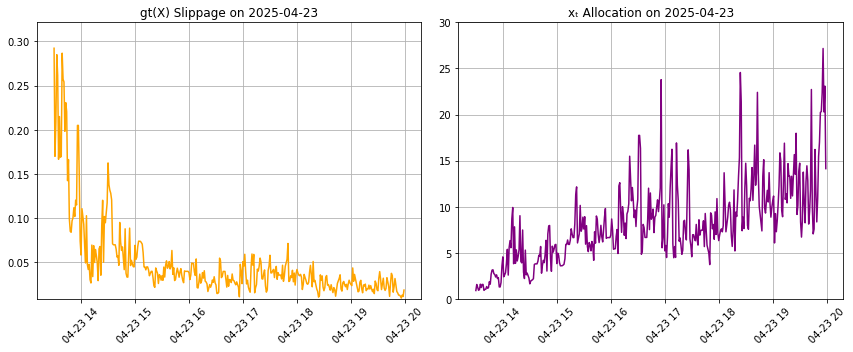

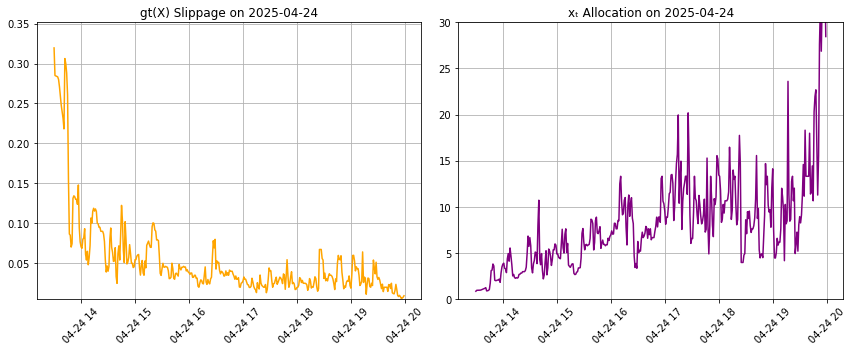

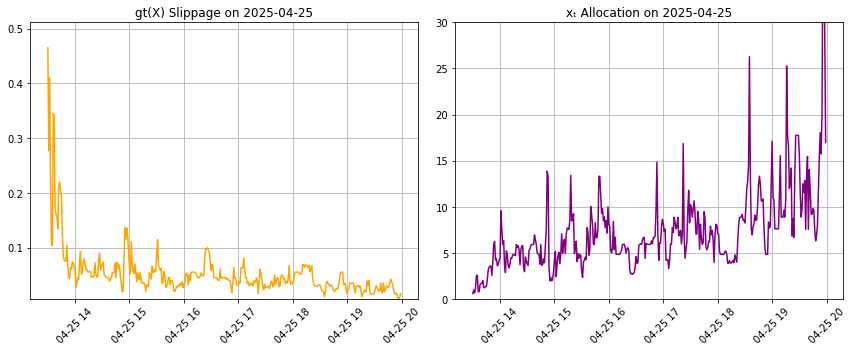

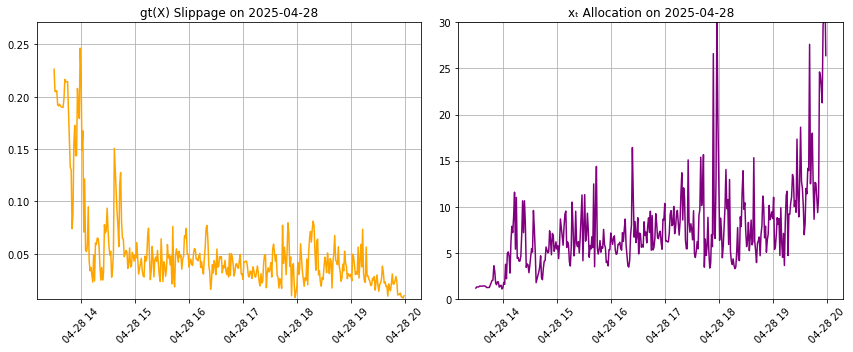

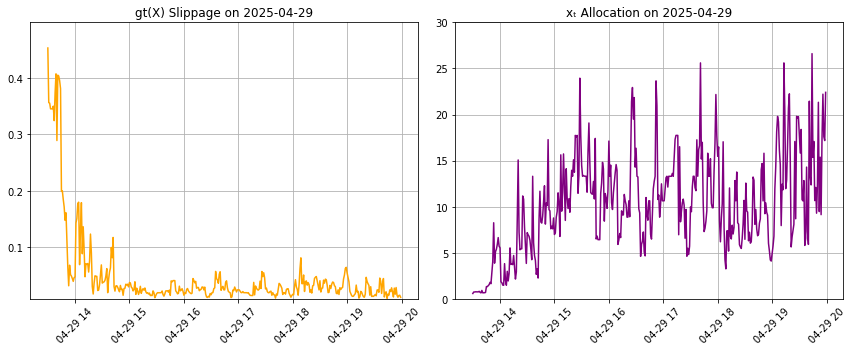

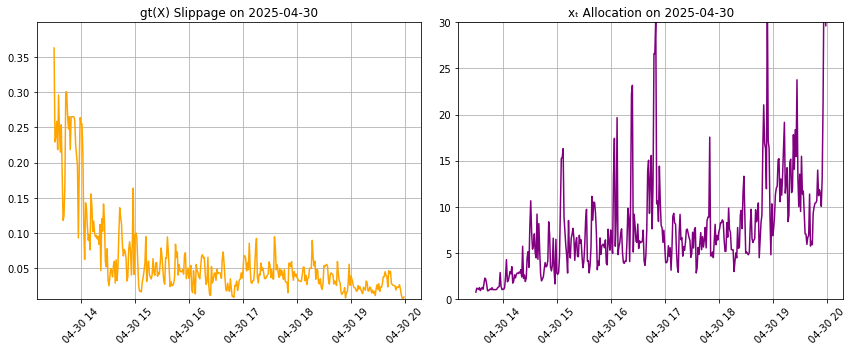

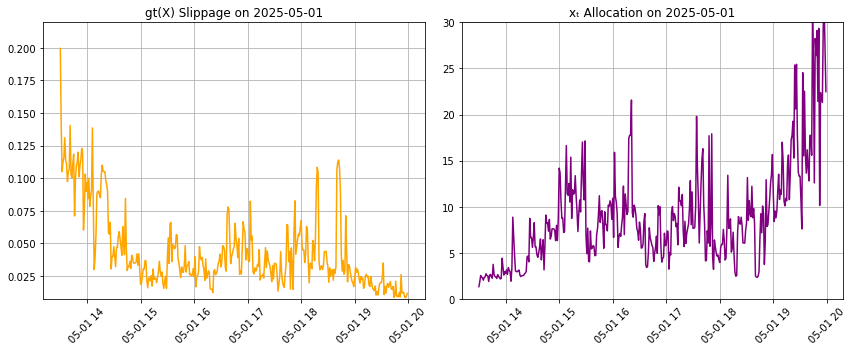

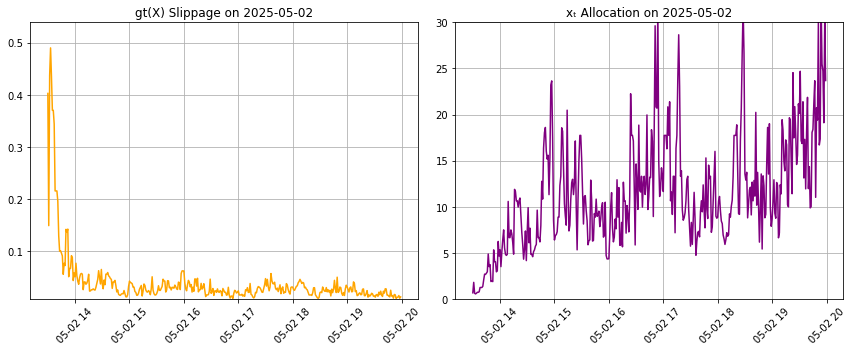

In [16]:
import matplotlib.pyplot as plt

# Parameters
S = 60000
X_order = 100
xt_ylim = (0, 30)

# Compute gt(X) and allocate xₜ
full_df['gtX'] = full_df.apply(lambda row: compute_gtX(row, X_order), axis=1)
full_df = full_df.dropna(subset=['gtX'])
full_df = full_df[full_df['gtX'] > 1e-8]
full_df['x_t'] = S * (1 / full_df['gtX']) / (1 / full_df['gtX']).sum()
full_df['date'] = full_df['minute'].dt.date

# Print summary stats
print(full_df[['minute', 'gtX']])
print("gtX Min:", full_df['gtX'].min(), "| Max:", full_df['gtX'].max())

# Plot gt(X) and xₜ for each day
for date, day_df in full_df.groupby('date'):
    if day_df['gtX'].isna().all():
        continue
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(day_df['minute'], day_df['gtX'], color='orange')
    axs[0].set_title(f"gt(X) Slippage on {date}")
    axs[0].set_ylim(day_df['gtX'].min() * 0.9, day_df['gtX'].max() * 1.1)
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()

    axs[1].plot(day_df['minute'], day_df['x_t'], color='purple')
    axs[1].set_title(f"xₜ Allocation on {date}")
    axs[1].set_ylim(xt_ylim)
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()

    plt.tight_layout()
    plt.show()
